In [6]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("C:/Users/lenov/Downloads/Titanic-Dataset.csv")

# Select numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Describe with basic stats
summary_stats = numeric_df.describe().T

# Add median and missing values
summary_stats["median"] = numeric_df.median()
summary_stats["missing_values"] = numeric_df.isnull().sum()

# Display the summary
summary_stats


,count,mean,std,min,25%,50%,75%,max,median,missing_values
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000,446.0000,0
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000,0.0000,0
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000,3.0000,0
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000,28.0000,177
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000,0.0000,0
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000,0.0000,0
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292,14.4542,0


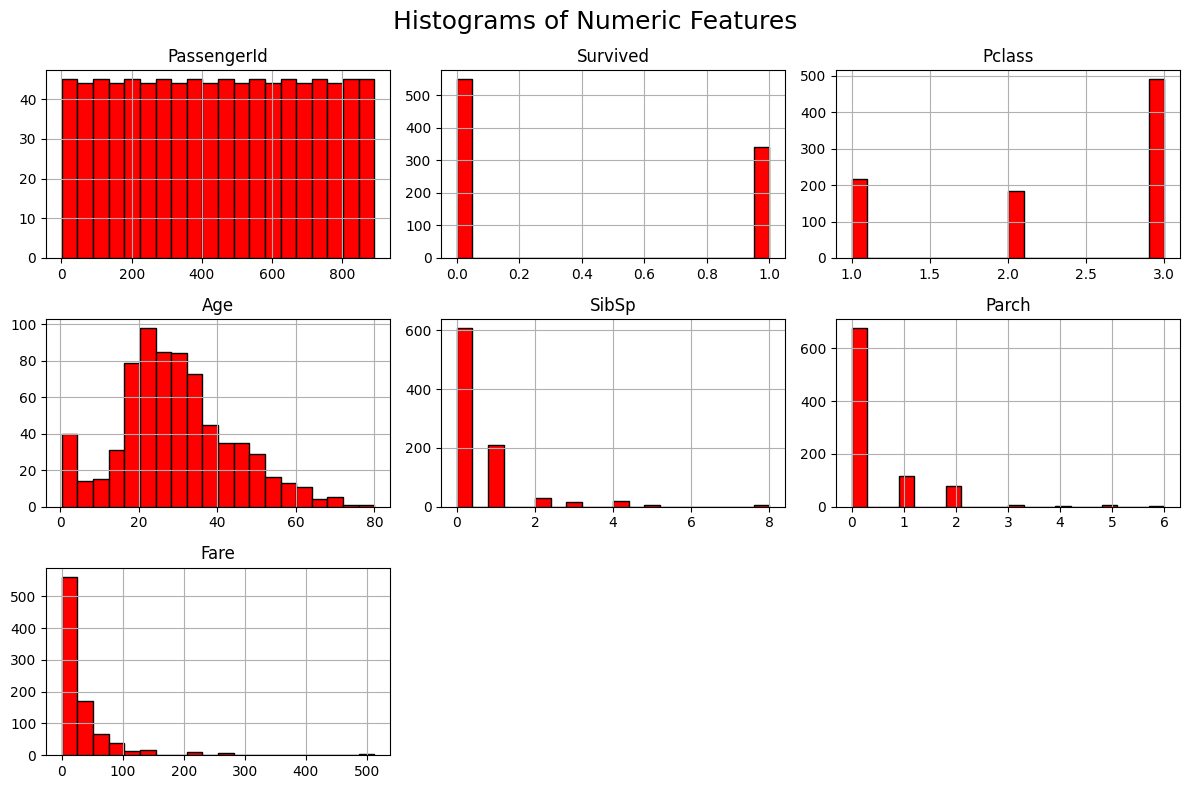

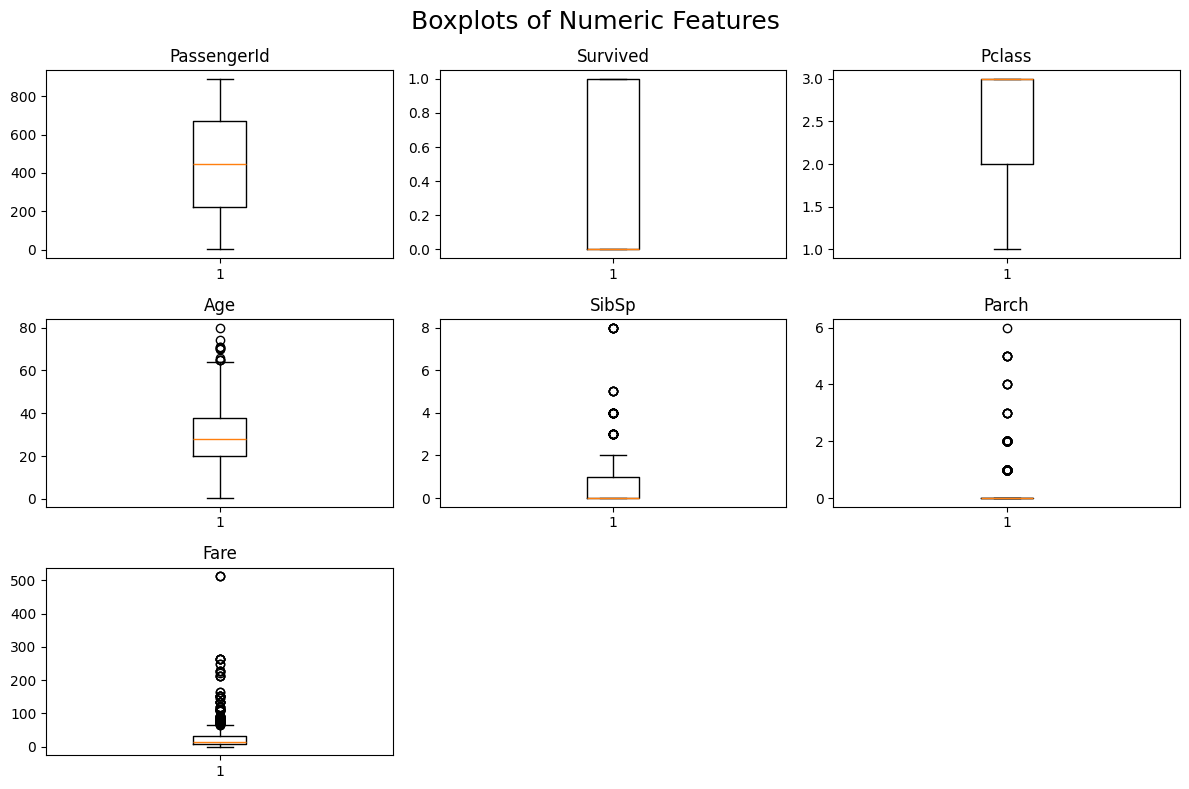

In [21]:
import matplotlib.pyplot as plt

# Plot histograms for each numeric column
numeric_df.hist(figsize=(12, 8), bins=20, color='red', edgecolor='black')
plt.suptitle('Histograms of Numeric Features', fontsize=18)
plt.tight_layout()
plt.show()

# Boxplots for each numeric column
plt.figure(figsize=(12, 8))
for i, column in enumerate(numeric_df.columns, 1):
    plt.subplot(3, 3, i)
    plt.boxplot(numeric_df[column].dropna())
    plt.title(column)
plt.suptitle('Boxplots of Numeric Features', fontsize=18)
plt.tight_layout()
plt.show()


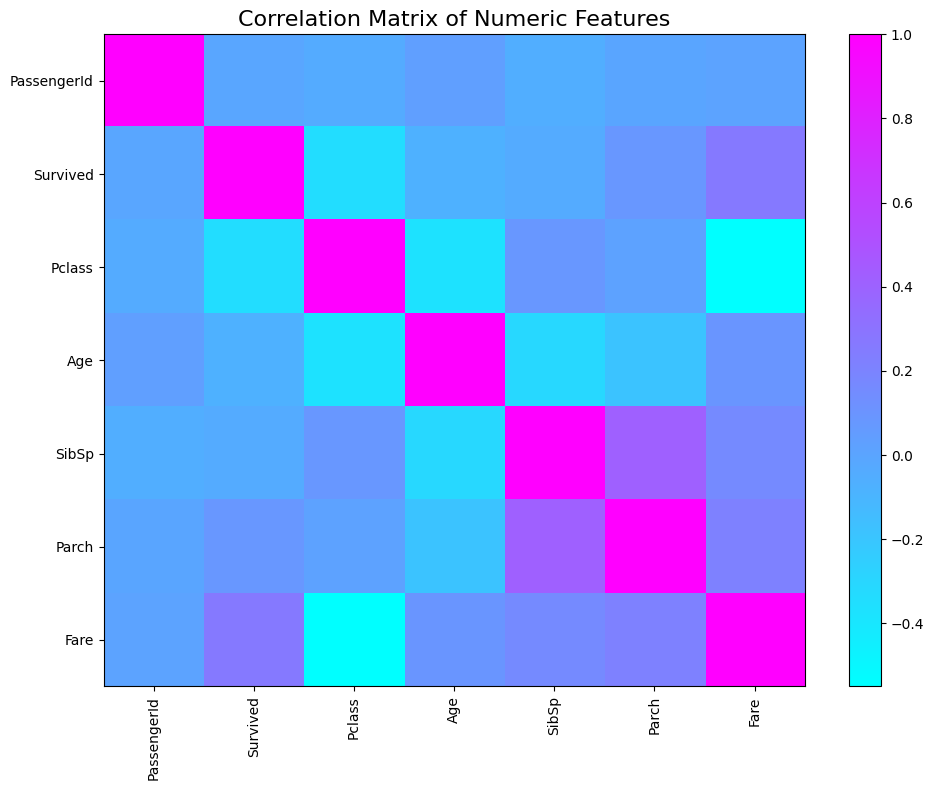

In [22]:
# Correlation matrix of numeric features
correlation_matrix = numeric_df.corr()

# Heatmap with matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='cool', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(ticks=np.arange(len(correlation_matrix.columns)), labels=correlation_matrix.columns, rotation=90)
plt.yticks(ticks=np.arange(len(correlation_matrix.index)), labels=correlation_matrix.index)
plt.title("Correlation Matrix of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()


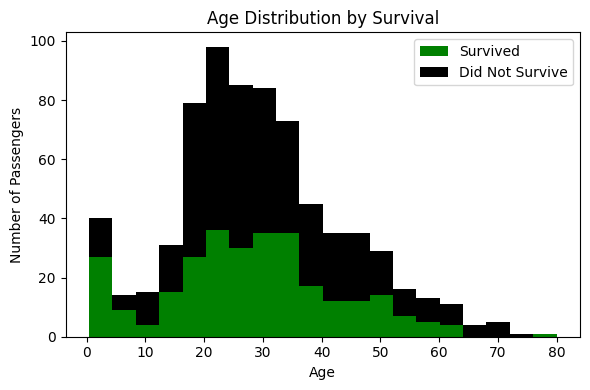

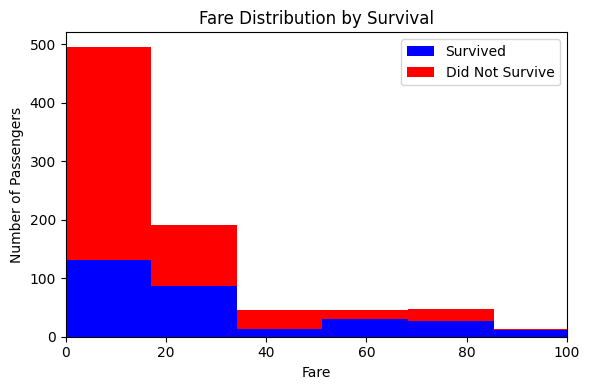

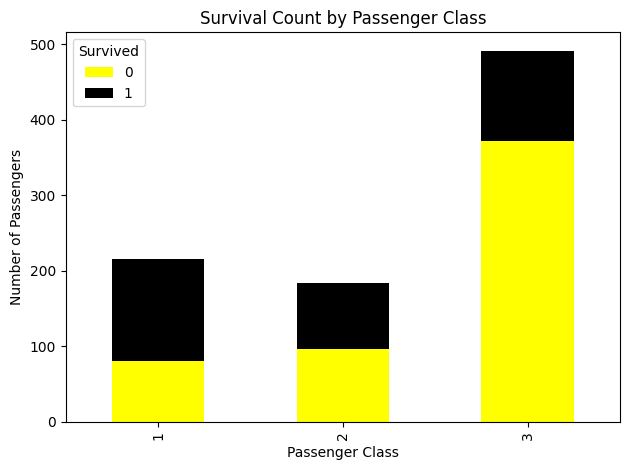

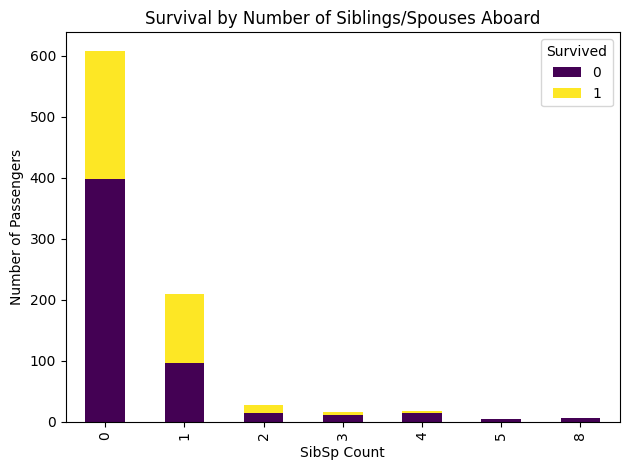

In [27]:
plt.figure(figsize=(6, 4))
plt.hist([df[df['Survived'] == 1]['Age'].dropna(),
          df[df['Survived'] == 0]['Age'].dropna()],
         label=['Survived', 'Did Not Survive'],
         bins=20, stacked=True, color=['green', 'black'])
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
plt.hist([df[df['Survived'] == 1]['Fare'],
          df[df['Survived'] == 0]['Fare']],
         label=['Survived', 'Did Not Survive'],
         bins=30, stacked=True, color=['blue', 'red'])
plt.xlim(0, 100)  # Zoom in to avoid outliers skewing plot
plt.title('Fare Distribution by Survival')
plt.xlabel('Fare')
plt.ylabel('Number of Passengers')
plt.legend()
plt.tight_layout()
plt.show()

df.groupby(['Pclass', 'Survived']).size().unstack().plot(kind='bar', stacked=True, color=['yellow', 'black'])
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.tight_layout()
plt.show()

df.groupby(['SibSp', 'Survived']).size().unstack().plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Survival by Number of Siblings/Spouses Aboard')
plt.xlabel('SibSp Count')
plt.ylabel('Number of Passengers')
plt.tight_layout()
plt.show()


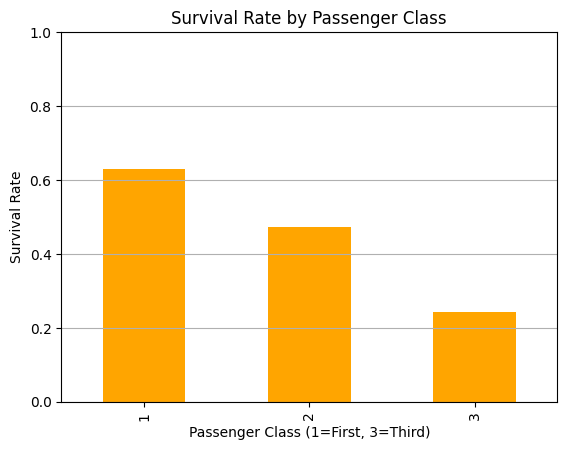

C:\Users\lenov\AppData\Local\Temp\ipykernel_5140\3888723100.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_survival = df.groupby('FareBin')['Survived'].mean()


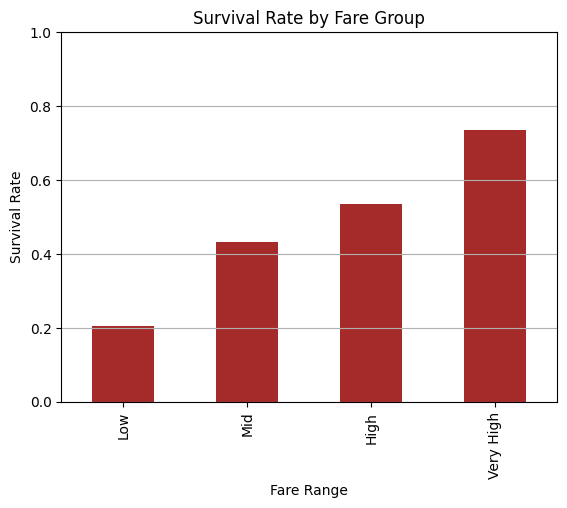

C:\Users\lenov\AppData\Local\Temp\ipykernel_5140\3888723100.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival = df.groupby('AgeBin')['Survived'].mean()


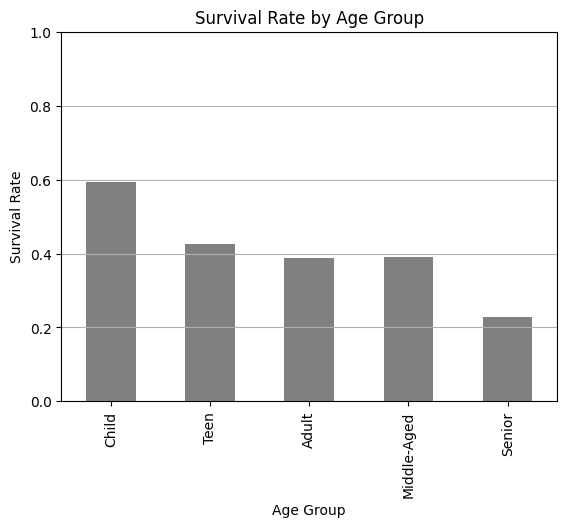

In [30]:
# Survival rate by passenger class
pclass_survival = df.groupby('Pclass')['Survived'].mean()

pclass_survival.plot(kind='bar', color='orange')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class (1=First, 3=Third)')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

# Create fare bins
df['FareBin'] = pd.cut(df['Fare'], bins=[0, 10, 30, 100, 600], labels=['Low', 'Mid', 'High', 'Very High'])

# Average survival by fare range
fare_survival = df.groupby('FareBin')['Survived'].mean()

fare_survival.plot(kind='bar', color='brown')
plt.title('Survival Rate by Fare Group')
plt.xlabel('Fare Range')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

# Create age bins
df['AgeBin'] = pd.cut(df['Age'], bins=[0, 10, 18, 40, 60, 80], labels=['Child', 'Teen', 'Adult', 'Middle-Aged', 'Senior'])

# Average survival by age group
age_survival = df.groupby('AgeBin')['Survived'].mean()

age_survival.plot(kind='bar', color='gray')
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()
